# **IMPORT DATASET**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [ ]:
customers = pd.read_csv('../input/brazilian-ecommerce/olist_customers_dataset.csv')
items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
payments = pd.read_csv('../input/brazilian-ecommerce/olist_order_payments_dataset.csv')
reviews = pd.read_csv('../input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
products = pd.read_csv('../input/brazilian-ecommerce/olist_products_dataset.csv')
prod_transl = pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')
geolocation= pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
seller=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')

# **MERGING DATA**

In [ ]:
df = customers.merge(right = orders, how = 'left', on = 'customer_id')
df = df.merge(right = payments, on = 'order_id')
df = df.merge(right = items, on = 'order_id')
df = df.merge(right = products, on = 'product_id')
df = df.merge(right = reviews, on = 'order_id')
df = df.merge(right = seller ,on = 'seller_id')
df = df.merge(right = prod_transl, on = 'product_category_name')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,8577,itaquaquecetuba,SP,office_furniture


In [ ]:
df.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000
mean,35061.537597,1.093747,2.946233,172.387379,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,4.034409,24515.713958
std,29841.671732,0.729849,2.781087,265.873969,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,1.385584,27636.640968
min,1003.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1001.000000
25%,11310.000000,1.000000,1.000000,60.870000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,6429.000000
50%,24241.000000,1.000000,2.000000,108.050000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000,13660.000000
75%,58745.000000,1.000000,4.000000,189.480000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,28605.000000
max,99980.000000,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,99730.000000


# **FEATURE ENGINEERING**

In [ ]:
df['review_comment_title'].fillna(value = 'no comment title', axis = 0, inplace = True)
df['review_comment_message'].fillna(value = 'no comment message', axis = 0, inplace = True)
df.dropna(axis = 0, inplace = True)
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4,no comment title,no comment message,2017-05-26 00:00:00,2017-05-30 22:34:40,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,7fc63200f12eebb5f387856afdd63db8,1,no comment title,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,7fc63200f12eebb5f387856afdd63db8,1,no comment title,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,251191809e37c1cffc16865947c18a4d,3,no comment title,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,f7123bac5b91a0e2e38d8b41fd1206f4,4,no comment title,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,8577,itaquaquecetuba,SP,office_furniture


In [ ]:
df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

# **EDA**

<AxesSubplot:xlabel='review_score', ylabel='Count'>

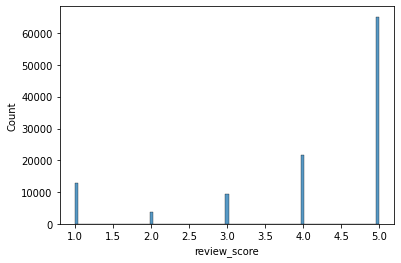

In [ ]:
sns.histplot(data=df, x='review_score')

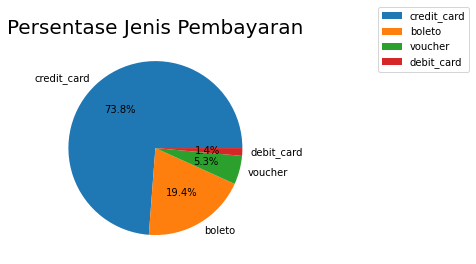

In [ ]:
payment_type = df.groupby('payment_type')['order_id'].count().reset_index()
payment_type = payment_type.rename(columns = {'order_id':'total_order'}).sort_values(by = 'total_order', ascending = False)


plt.pie(x = payment_type['total_order'], labels = payment_type['payment_type'], autopct='%0.1f%%' )

plt.title('Persentase Jenis Pembayaran', fontsize = 20, y = 1)
plt.legend(loc ="center left",bbox_to_anchor =(1.5, 0.5, 0.5, 1))

plt.show()

In [ ]:
df.payment_type.value_counts()

credit_card    83534
boleto         22015
voucher         6022
debit_card      1622
Name: payment_type, dtype: int64

In [ ]:
df.customer_id.value_counts()

270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
d22f25a9fadfb1abbc2e29395b1239f4    24
6ee2f17e3b6c33d6a9557f280edd2925    24
                                    ..
36c6b4c96148d32c037b90aa0673bfcd     1
d9cc52f8687d008c962789641cb4ee0d     1
62104fadfa739ae952769448b2e3886c     1
47582d9527dd8483589057d536cab7ae     1
915a55b0a3ded24f1d8ba3c38018cbc7     1
Name: customer_id, Length: 94471, dtype: int64

# **MACHINE LEARNING**

Customer Churn mengacu pada hilangnya pelanggan. Artinya, jika seorang pelanggan atau klien berhenti mengambil layanan dari suatu perusahaan, dikatakan telah churn.

Churn terkait erat dengan kinerja perusahaan. Semakin banyak orang belajar tentang perilaku pembeli, semakin banyak uang yang bisa dihasilkan. Menganalisis alasan mengapa pelanggan *churn* juga membantu dalam menemukan dan memperbaiki kekurangan layanan yang diberikan oleh perusahaan.

Untuk menaganalisis alasan pelanggan berhenti untuk berlangganan. Saya akan menggunakan analisis RFM. Analisis RFM adalah analisis berdasarkan perilaku pelanggan yang ada untuk memprediksi bagaimana kemungkinan tindakan pelanggan baru di masa depan. Model RFM dibangun menggunakan tiga faktor utama:
(**Recency**) seberapa baru pelanggan bertransaksi dengan merek seberapa sering (**Frequency**) mereka terlibat dengan merek berapa banyak uang (**Monetary**) yang mereka habiskan untuk produk dan layanan merek sistem CRM dasar dapat melakukan pelacakan dasar dari tiga karakteristik yang mudah diukur yang berkontribusi pada analisis RFM :

**Recency** : Ini mengacu pada jumlah waktu sejak interaksi terakhir pelanggan dengan suatu merek, yang dapat mencakup pembelian terakhir mereka, dan waktu kunjungan terakhir pelanggan tersebut

**Frequency**: Ini mengacu pada berapa kali pelanggan melakukan pembelian atau berinteraksi dengan merek  selama periode waktu tertentu. Frekuensi yang lebih besar menunjukkan tingkat loyalitas pelanggan yang lebih tinggi.

**Monetary**: Ini mengacu pada jumlah total yang dihabiskan pelanggan untuk membeli produk dan layanan dari merek selama periode waktu tertentu.

In [ ]:
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

In [ ]:
df[time_columns]=df[time_columns].apply(pd.to_datetime)

In [ ]:
present_day = df['order_purchase_timestamp'].max() + dt.timedelta(days=2)
present_day

Timestamp('2018-08-31 15:00:37')

In [ ]:
print("Latest date in dataset: ", df['order_purchase_timestamp'].max())

Latest date in dataset:  2018-08-29 15:00:37


In [ ]:
recency_df= pd.DataFrame(df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
91461,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
91462,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
91463,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [ ]:
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
recency_df

,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,116
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,538
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,322
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,289
...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,448
91461,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,263
91462,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,569
91463,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,120


**Misalkan pelanggan yang tidak pernah beli dalam 100 hari dianggap churn**

In [ ]:
recency_df['is_churn'] = recency_df['Recency'].apply(lambda x: True if x >= 100 else False)
recency_df

,customer_unique_id,order_purchase_timestamp,Recency,is_churn
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,True
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,116,True
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,538,True
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,322,True
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,289,True
...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,448,True
91461,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,263,True
91462,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,569,True
91463,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,120,True


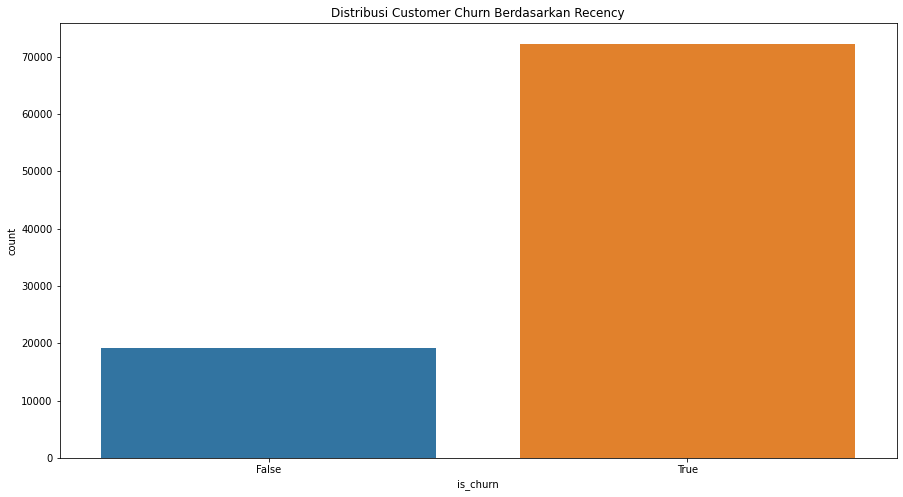

In [ ]:
churn_customer = recency_df.drop_duplicates(subset='customer_unique_id').reset_index()
plt.figure(figsize=(15,8))
sns.countplot(x='is_churn', data=churn_customer)
plt.title('Distribusi Customer Churn Berdasarkan Recency')
plt.show()

In [ ]:
frequency_df = pd.DataFrame(df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)

In [ ]:
monetary_df = df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']

In [ ]:
RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RF_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')

In [ ]:
RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RF_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')
RFM_df

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
2,0000f46a3911fa3c0805444483337064,538,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89
...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,448,1,4134.84
91461,fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58
91462,ffff371b4d645b6ecea244b27531430a,569,1,112.46
91463,ffff5962728ec6157033ef9805bacc48,120,1,133.69


In [ ]:
RFM_df.describe()

,Recency,Frequency,Monetary
count,91465.000000,91465.000000,91465.000000
mean,238.094091,1.032865,212.312425
std,152.578650,0.206208,631.309409
min,2.000000,1.000000,9.590000
25%,115.000000,1.000000,63.840000
50%,219.000000,1.000000,112.840000
75%,346.000000,1.000000,202.760000
max,696.000000,14.000000,109312.640000


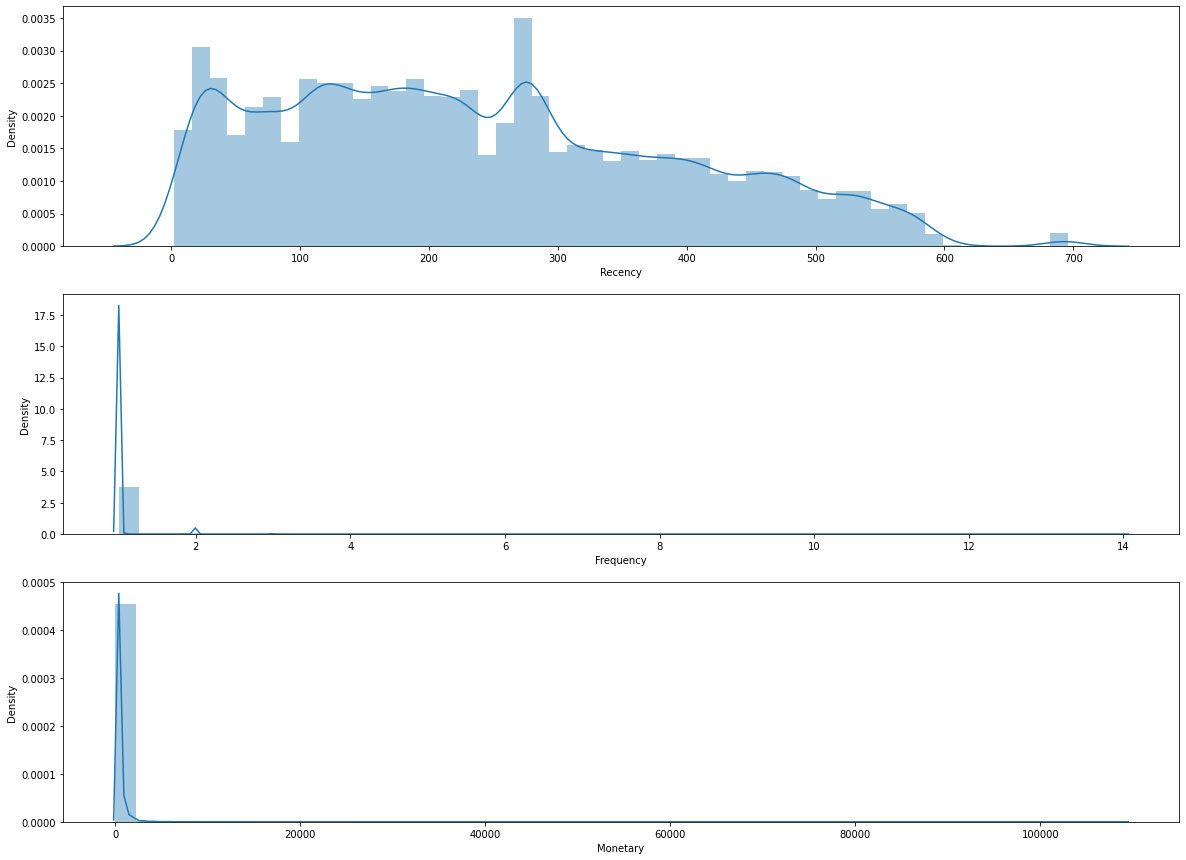

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_df['Monetary'])
plt.show()

In [ ]:
RFM_df["recency_score"]  = pd.qcut(RFM_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM_df["frequency_score"]= pd.qcut(RFM_df['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM_df["monetary_score"] = pd.qcut(RFM_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [ ]:
RFM_df['Segment'] = RFM_df['recency_score'].astype(str) + RFM_df['frequency_score'].astype(str) + RFM_df['monetary_score'].astype(str)
RFM_df['Segment'] = RFM_df['Segment'].replace(seg_map, regex=True)
RFM_df

,customer_unique_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,4,1,4,Promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,4,1,1,New Customers
2,0000f46a3911fa3c0805444483337064,538,1,86.22,1,1,2,Lost customers
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1,Hibernating customers
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,1,4,Cannot Lose Them
...,...,...,...,...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,448,1,4134.84,1,5,5,Cannot Lose Them
91461,fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,3,5,2,Potential Loyalist
91462,ffff371b4d645b6ecea244b27531430a,569,1,112.46,1,5,3,At Risk
91463,ffff5962728ec6157033ef9805bacc48,120,1,133.69,4,5,3,Potential Loyalist


In [ ]:
RFMStats = RFM_df[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])
RFMStats

Recency                         Frequency         \
                             mean median  min  max  count      mean median   
Segment                                                                      
About To Sleep         277.346921  279.0  178  382   5716  1.000525    1.0   
At Risk                386.069801  366.0  270  696  15759  1.041817    1.0   
Cannot Lose Them       436.850703  438.0  270  696   5834  1.060850    1.0   
Champions               85.115212   81.0    2  177   5581  1.199247    1.0   
Hibernating customers  342.745262  326.0  178  695   8232  1.000000    1.0   
Lost customers         475.359991  469.0  383  696   4564  1.001972    1.0   
Loyal                  177.820174  192.0    2  269   5978  1.093008    1.0   
Need Attention         156.353329  178.0    2  269   5618  1.000000    1.0   
New Customers          124.323364  127.0    2  269   5149  1.000000    1.0   
Potential Loyalist     131.026739  130.0    2  269  17278  1.018058    1.0   
Promising              106.143841   92.0    2  269  11756  1.000000    1.0   

                                        Monetary                              \
                      min max  count        mean   median     min        max   
Segment                                                                        
About To Sleep          1   2   5716   52.829057   45.000   10.07     139.80   
At Risk                 1   6  15759  296.158424  163.460   56.05   36489.24   
Cannot Lose Them        1   4   5834  367.269734  204.535   89.70  109312.64   
Champions               1  14   5581  480.549362  269.440  140.03   30186.00   
Hibernating customers   1   1   8232   80.120351   75.625   11.63     139.98   
Lost customers          1   3   4564   45.276731   43.620   12.28      89.29   
Loyal                   1   9   5978  395.919978  239.415   89.73   44048.00   
Need Attention          1   1   5618  271.388701  174.420   89.74   29099.52   
New Customers           1   1   5149   53.293704   51.340    9.59      89.67   
Potential Loyalist      1   3  17278   75.360472   70.970   10.89     139.98   
Promising               1   1  11756  279.965481  164.975   14.06   19174.38   

                              
                       count  
Segment                       
About To Sleep          5716  
At Risk                15759  
Cannot Lose Them        5834  
Champions               5581  
Hibernating customers   8232  
Lost customers          4564  
Loyal                   5978  
Need Attention          5618  
New Customers           5149  
Potential Loyalist     17278  
Promising              11756

In [ ]:
RFMStats['Ratio']= (100*RFMStats['Monetary']["count"]/RFMStats['Monetary']["count"].sum()).round(2)
RFMStats

Recency                         Frequency         \
                             mean median  min  max  count      mean median   
Segment                                                                      
About To Sleep         277.346921  279.0  178  382   5716  1.000525    1.0   
At Risk                386.069801  366.0  270  696  15759  1.041817    1.0   
Cannot Lose Them       436.850703  438.0  270  696   5834  1.060850    1.0   
Champions               85.115212   81.0    2  177   5581  1.199247    1.0   
Hibernating customers  342.745262  326.0  178  695   8232  1.000000    1.0   
Lost customers         475.359991  469.0  383  696   4564  1.001972    1.0   
Loyal                  177.820174  192.0    2  269   5978  1.093008    1.0   
Need Attention         156.353329  178.0    2  269   5618  1.000000    1.0   
New Customers          124.323364  127.0    2  269   5149  1.000000    1.0   
Potential Loyalist     131.026739  130.0    2  269  17278  1.018058    1.0   
Promising              106.143841   92.0    2  269  11756  1.000000    1.0   

                                        Monetary                              \
                      min max  count        mean   median     min        max   
Segment                                                                        
About To Sleep          1   2   5716   52.829057   45.000   10.07     139.80   
At Risk                 1   6  15759  296.158424  163.460   56.05   36489.24   
Cannot Lose Them        1   4   5834  367.269734  204.535   89.70  109312.64   
Champions               1  14   5581  480.549362  269.440  140.03   30186.00   
Hibernating customers   1   1   8232   80.120351   75.625   11.63     139.98   
Lost customers          1   3   4564   45.276731   43.620   12.28      89.29   
Loyal                   1   9   5978  395.919978  239.415   89.73   44048.00   
Need Attention          1   1   5618  271.388701  174.420   89.74   29099.52   
New Customers           1   1   5149   53.293704   51.340    9.59      89.67   
Potential Loyalist      1   3  17278   75.360472   70.970   10.89     139.98   
Promising               1   1  11756  279.965481  164.975   14.06   19174.38   

                              Ratio  
                       count         
Segment                              
About To Sleep          5716   6.25  
At Risk                15759  17.23  
Cannot Lose Them        5834   6.38  
Champions               5581   6.10  
Hibernating customers   8232   9.00  
Lost customers          4564   4.99  
Loyal                   5978   6.54  
Need Attention          5618   6.14  
New Customers           5149   5.63  
Potential Loyalist     17278  18.89  
Promising              11756  12.85

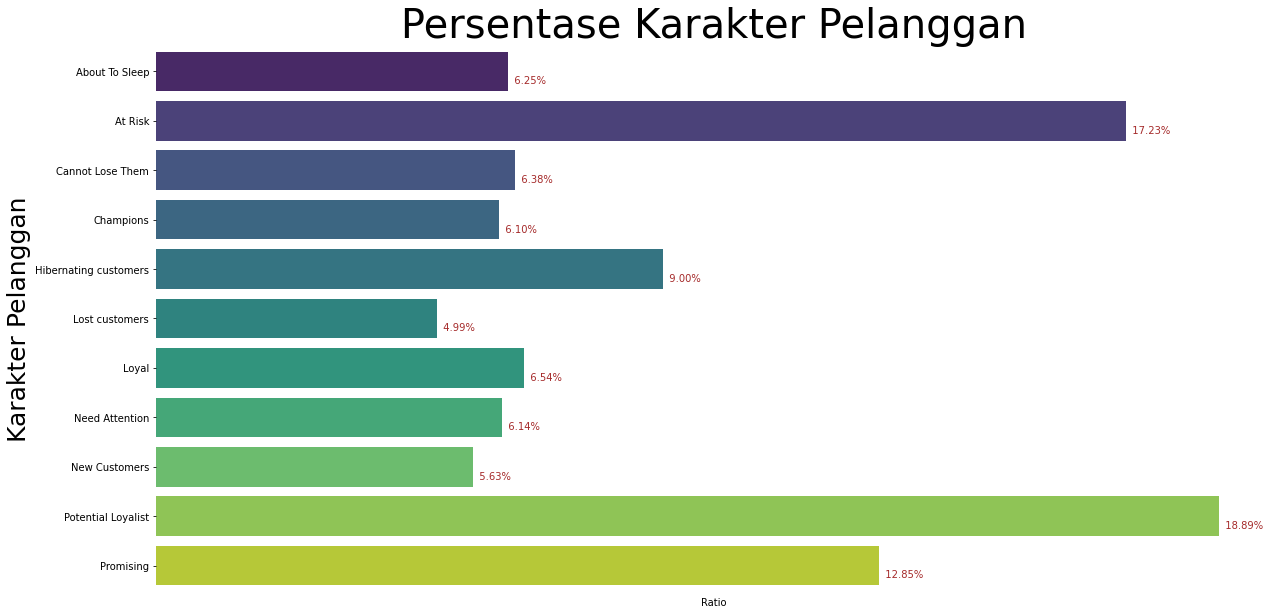

In [ ]:
plt.figure(figsize=(20,10))
per= sns.barplot(x=RFMStats['Ratio'], y=RFMStats.index, data=RFMStats, palette="viridis")
sns.despine(bottom = True, left = True)
for i, v in enumerate(RFMStats['Ratio']):
    per.text(v, i+.25,"  {:.2f}".format(v)+"%", color='brown', ha="left")
per.set_ylabel('Karakter Pelanggan', fontsize=25)
per.set(xticks=[])
plt.title('Persentase Karakter Pelanggan', fontsize=40)
plt.show()

# KESIMPULAN DAN SARAN

* **Lost Customer**
adalah tipe pelanggan yang jarang membeli dan juga tidak terlalu banyak menghabiskan uang untuk membeli produk. Dalam hasil akhir persentase didapat bahwa **4,99%** dari total pelanggan adalah tipe tersebut. Kita tidak terlalu memikirkan pelanggan tersebut karena semisalnya pelanggan tersebut kembali untuk membeli mereka tidak akan menghabiskan banyak uang untuk membeli produk.

* **Hibernating customers** adalah tipe pelanggan yang segera menjadi Lost Customer dikarenakan terakhir mereka membeli produk sudah cukup lama dan mereka tidak terlalu menghabiskan uang untuk membeli produk tersebut. Terdapat **9%** persentase dari pelanggan adalah tipe ini. Sebaiknya kita mulai memperbaiki brand menjadi lebih baik dan tawarkan pelanggan dengan barang yang relevan dan penawaran yang sesuai.

*  **Cannot lose them** adalah tipe pelanggan yang sudah lama tidak kembali membeli produk namun sebelumnya membeli produk dengan banyak uang. khusus pelanggan ini kita harus menyiapkan promosi diskon dan hadiah untuk mereka dan memikirkan alasan mengapa pelanggan ini tidak kembali untuk membeli. **KITA TIDAK BOLEH KEHILANGAN MEREKA** . **6,38%** dari pelanggan adalah mereka yang harus kita usahakan agar kembali membeli produk dari toko kita

* **At risk** adalah tipe pelanggan ini  sangat mirip dengan pelanggan  *Cannot lose them* tetapi pelanggan hanya kadang kadang saja untuk membeli. Pelanggan  ini bahkan mungkin sedikit lebih berharga daripada tipe pelanggan *Cannot lose them* karena pelanggan ini lebih sering membeli akhir akhir ini. Dalam hasil akhir persentase terdapat **17,23%** pelanggan merupakan tipe pelanggan ini. **KITA HARUS MEMPERTAHANKAN MEREKA**. Karena mereka adalah pelanggan yang **mengeluarkan biaya besar** untuk membeli produk dengan cara memberikan terus promo dan penawaran yang bagus

* **About to sleep** adalah tipe pelanggan yang belum melakukan pembelian dalam waktu yang relatif lama tetapi mereka masih mengakses dan melihat lihat produk kita. Terdapat **6,25%** dari pelanggan merupakan tipe pelanggan ini .  Oleh karena itu, kita harus membuat mereka untuk membeli produk kita dengan memberikan diskon dan penawaran harga yang terbaik.

* **Need attention** adalah tipe pelanggan yang membutuhkan pertimbangan mengenai produk yang akan mereka beli selanjutnya. Tipe pelanggan ini cukup sering mengakses produk dan membeli dengan biaya yang cukup besar.**6,14%** dari tipe pelanggan adalah tipe pelanggan ini. Solusi yang terbaik adalah kita harus berkomunikasi dengan tim marketing untuk meningkatkan minat/motivasi pelanggan ini untuk membeli produk toko kita seperti  menampilkan  rekomendasi produk di situs web

* **Promising** adalah tipe pelanggan yang setingkat lebih baik dari tipe pelanggan *Need attention* dalam segi seringnya mengakses/mengecek produk kita. **12,85%** dari tipe pelanggan adalah tipe pelanggan ini. Ini merupakan hal yang baik karena angka tersebut cukup besar dibandingkan tipe pelanggan yang lainnya. Meskipun mereka belum terlalu banyak mengeluarkan uang mereka untuk produk kita, Masih ada harapan kedepannya tipe pelanggan ini akan berlangganan dengan produk kita. Usaha yang dapat kita lakukan adalah terus mengembangkan kepercayaan produk kita kepada tipe pelanggan ini terus berlangganan pada produk kita

* **New customers** adalah tipe pelanggan yang relatif baru dengan pembelian  rata-rata atau di bawah rata-rata dan mereka belum menjadi pelanggan tetap  mungkin ini adalah pembelian pertama mereka dari produk kita. Kita belum mengenal pelanggan ini sehingga mereka masih memiliki potensi untuk menjadi sangat berharga. Kita harus menawarkan mereka diskon untuk produk tambahan di keranjang untuk melihat apakah mereka adalah jenis pelanggan yang dapat kita jual. **5.63%** pelanggan adalah tipe pelanggan baru. Kita harus sering sering mengirikan survei kepada tipe pelanggan  ini agar lebih memahami apa keinginan/ ekspetasi pelanggan ini kepada produk kita agar pelanggan ini memutuskan untuk berlangganan terus kepada produk kita

* **Potential loyalists** adalah tipe pelanggan yang cukup sering mengakses produk kita dan mengeluarkan biaya yang cukup diatas rata rata. Terdapat **18.89%** dari tipe pelanggan adalah pelanggan yang bisa dinilai pelanggan yang mulai berkeinginan untuk terus berlangganan pada produk kita. Ini merupakan hal baik pada toko kita. Sebaiknya kita terus merekomendasikan produk kepada tipe pelanggan ini dan tentunya kita perlu apresiasi tipe pelanggan ini seperti melibatkan mereka  dalam program loyalitas.

* **Loyal** adalah tipe pelanggan yang  aktif dan mengeluarkan banyak biaya untuk membeli produk kita. **6,54%** dari pelanggan kita adalah pelanggan loyal. Kita sebaiknya merekomendasikan mereka barang yang harganya lebih tinggi tetapi tetap meminta ulasan dari mereka tergantung produk tersebut agar mereka tetap loyal kepada produk kita meskipun harganya naik

* **CHAMPIONS** adalah tipe pelanggan terbaik dari semua pelanggan. Terdapat **6.1%** pelanggan adalah tipe pelanggan terbaik. Hal ini dinilai dari keaktifan pelanggan ini untuk membeli produk pada toko kita dan membelinya dengan rata rata harga yang sangat tinggi . Kita harus memperhatikan terus pelanggan ini agar tetap menjadi tipe pelanggan yang terbaik contohnya melibatkan program loyalitas dan meminta ulasan mereka terhadap produk kita